In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<center> 

# Statistics and Sampling

## Amanda R. Kube Jotte
    
<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DSSI.png" width="800">
    
</center>

## Remember where we left off yesterday?

We have some **population** we want to learn about - all penguins

We can't (infeasible, expensive, impossible) measure the whole population - **census**

We can measure a smaller potion, or **sample**, of that population

What we want to calculate/know about a **p**opulation is called the **parameter**

We estimate the parameter by calculating this on the **s**ample instead - a **statistic**

So what is a **representative** sample?

A poorly designed sampling procedure can produce misleading conclusions.
* Example (Non-representative sample)
  - I want to learn the most common University majors and my sample is you guys.
* Example (Voluntary response sample)
  - I want to know how many people believe in ghosts so I put out an ad asking people to respond with their answers.

## Simple Random Sampling

A **simple random sample (SRS)** of size n from a population is one in which every group of n units has an equal chance of being selected as the sample.

We use a SRS to:
* eliminate sampling bias
* mathematically or computationally quantify variation due to sampling (i.e. the precision of our sample estimates)

Need a sampling frame (e.g., list of names of all subjects in a population)

Impractical for large populations

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/srs.png" alt="SRS" width="500" height="600">
    
</center>

## Stratified Sampling

**Stratified random sample**: Divide the population into sub-populations (called strata) of similar units and choose a separate SRS for each stratum.

The aim is to obtain more exact information than an SRS of the same size.

It works better when cases within stratum are similar but there are large discrepancies between strata.

Cons: need sampling frames for each strata.

Example (University survey): "Do you favor the creation of a degree program in data science?" Possible strata?

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/strat.png" alt="Stratified Sample" width="500" height="600">
    
</center>

## Cluster Sampling

**Cluster sampling**: Population is divided into clusters; Select a sample of clusters.

Works better when there is small cluster-to-cluster variation but large variation within clusters.

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/cluster.png" alt="Cluster Sample" width="500" height="600">
    
</center>

## Multistage Sampling

This is often done for nationwide samples of families,
households, or individuals.

Sampling is conducted in stages.

Example: Government data on unemployment are gathered by the Current Population Survey, which conducts interviews in about 60,000 households each month. An SRS is impractical. The final sample consists of clusters of nearby households. To take a national multistage sample:
* Stage 1: Select a sample from the 3000 counties of the US
* Stage 2: Select a sample of townships within each of the counties chosen
* Stage 3: Select a sample of city blocks within each chosen township
* Stage 4: Take a sample of households within each city block

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/multistage.png" alt="Multistage Sample" width="900">
    
</center>

## Sampling Bias

**Selection bias**: systematic error favoring some parts of the population over others (eg voluntary response sample).

**Non-response bias**: people who decline to respond may be different from those who do respond (with respect to the
issue of interest)

**Response bias**: there are sometimes incentives to lie. Influenced by phrasing of questions, tone/attitude of interviewer, questions about illegal/unpopular behavior (e,g, "Do you wash your hands after using the bathroom?" or "Have you violated social distancing guidelines?")

## Truman vs Dewey

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DeweyDefeatsTruman.jpg" alt="Dewey Defeats Truman" width="700">
    
</center>

A poorly designed sampling procedure can produce misleading conclusions.

Even with a representative sample or a census we can come to incorrect conclusions if we do not understand our data or study design.

The quality of results obtained from data analysis is only as good as the data used (garbage-in garbage-out)

Analysis should involve good design, measurement and collection of data. Possible issues:

* how to design the data collection, so we can answer the questions of interest?
* from how many individuals or subjects should we collect the data?
* how do we select the subjects?
* how do we assign treatments in an experiment?

## Causation vs Association

Spurious correlations: https://www.tylervigen.com/spurious-correlations

How can we tell if something is actually causal?

1) The cause came before the effect - simple

2) The effect didn't happen by chance - replication

3) There is no other cause for the relationship - harder...

When we see that two variables X and Y are associated, we often wonder if one causes the other. There are 3 possible scenarios:

**Causation**: change in X causes change in Y (or vice-versa)

**Confounding**: some other variable Z causes change in both X and Y

**Colliding**: changes in both X and Y cause change in some variable Z

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DAGs.png" alt="DAGS" width="900">
    
</center>

## Gold Standard - An Experiment

**Experiments**: one or more factors controlled by experimenter (deliberately impose certain treatments on individuals in order to observe their responses)

### Experimental Design

**Control**: to understand the effects of a treatment, need a control group

**Replication**: applying a treatment independently to two or more experimental units

**Randomization**: random assignment of treatments to experimental units

### As a data scientist, most of your data won't look like this...

**Observational studies**: no effort/intention to manipulate the object of study (collect the data without interfering with the subjects)

### Types of Observational Studies

**Retrospective studies**: collect data after events have
taken place (e.g. past records, historical data). 
 * Example: Select a group of people who had skin cancer and a group of controls (no skin cancer) and ask about tanning bed usage

**Prospective studies**: identifies individuals and collects information as events unfold. 
  * Example: Enroll 500 subjects. Ask them to complete daily diet diaries (used to estimate the amount of sodium intake). Measure their blood pressure

It is very important you understand your data, how it was collected, and what you can (or can't) say about it!

In our activity from yesterday, we used observational data about penguins.

We saw that random sampling created a more representative sample and allowed us to calculate a statistic that was a good estimate for our parameter.

Once we understand our data and have explored it thoroughly, sometimes we want to make stronger claims about the statistics we calculate or compare statistics from different samples.

We do this by testing our **hypotheses** about these statistics in something called a **Hypothesis Test**.

Later today, you will learn about hypothesis testing, what it means to say something is significant, and some common examples of hypothesis tests.

But first...

... you need to learn a bit about probability distributions.

The histograms you made yesterday,

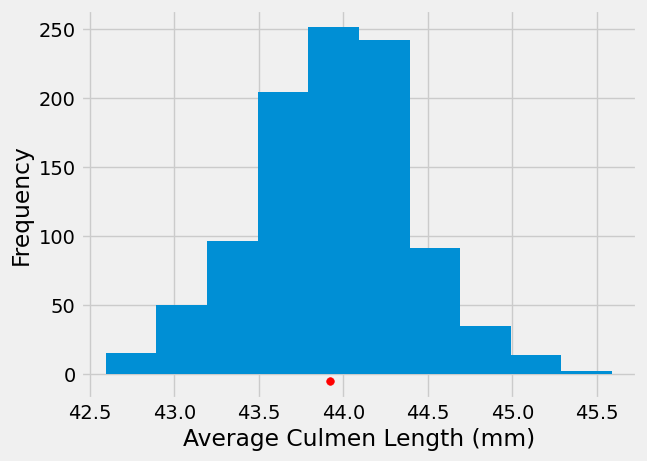

In [6]:
penguins = pd.read_csv("https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/penguins_size.csv")


outcomes = np.array([])

for i in np.arange(1000):
    my_sample = penguins.sample(100)
    outcomes = np.append(outcomes, my_sample.culmen_length_mm.mean())
    

plt.hist(outcomes)
plt.scatter(penguins.culmen_length_mm.mean(), -5, color='red', s=30)
plt.xlabel("Average Culmen Length (mm)")
plt.ylabel("Frequency");

... create something called an **empirical distribution**. Distributions have useful properties that allow us to do **Hypothesis Testing** 